## Part 3. Clustering Algorithm

### Implement Clustering Algorithm  
The algorithm is as follows:
1. Sort the edges in the graph by their weight (ie the correlation)
2. Create a single-node set for each node in the graph
3. Repeat k times:  
  + Pick the highest-weight edge (this is a greedy choice)
  + Merge the sets containing the source and the destination of the edge  
  + Repeat from (a) with the next-highest weight edge
4. Return the remaining sets

#### Sort the edges  
Since the analysis requires a set of new data, which consists of Company Name 1, Company Name 2 and its correlation value, the data must be rearranged in this way before continuing to sort the node data. The analysis calculated the correlation for all companies, data was sorted based on correlation between companies. The analysis only includes combination of the companies, but it excludes correlation of companies to itself, where its correlation would be equal to 1. Furthermore, if the table already had correlation value of 'AAPL' and 'AMZN', it would not store the correlation value of 'AMZN' and 'AAPL', and vice versa.

In [16]:
#Populate the correlation value for each company within S&P 500 and sort based on the correlation value (from higher to lower)
col = dailyret.columns.tolist()

def sortCorr():
    edges = list()
    for i in range(0, cor.shape[0]):
       for j in range(i + 1, cor.shape[0]):
           edges.append((cor.iloc[i,j], col[i], col[j]))
    edges = sorted(edges, reverse = False)
    return edges

sortCorr = sortCorr()

#### Create single-node set from each node in the graph
In this part, the analysis initiates a set of data (using dictionary data type) to populate companies clusters based on correlation to the list.

In [17]:
#Initiate clusters with nodes pointing at themselves
col = dailyret.columns.tolist()
def initiateCluster():
    nodePointers = {}
    for i in col:
        nodePointers[i] = i
    return nodePointers

Next step of the analysis is to assign a number to elements of the dictionary to start the iteration and populate the connection between the elements (i.e. edges). However, the input number must not exceed the sorted correlation table. Since the number of companies is less than correlation table, the connection for all companies will be produced before correlation table reach its minimum value.

In [18]:
#Create cluster function    
def tryCluster(k):
    nodePointers = initiateCluster()
    L = []
    if k > len(sortCorr) or k < 0: #compare k with the sorted correlation table length
        print('Invalid k')
    else:
        for i in range(k):
            input2 = sortCorr[i]
            startingpoint = input2[1]
            endingpoint = input2[2]
            while nodePointers[startingpoint] != startingpoint:
                startingpoint = nodePointers[startingpoint]
            while nodePointers[endingpoint] != endingpoint:
                endingpoint = nodePointers[endingpoint]
            
            nodePointers[startingpoint] = endingpoint
            c = [startingpoint, endingpoint]
            L.append(c) #to populate connected companies
    return nodePointers, L

To provide better visualization and to compliment the discussion, the analysis produces plot function based on the connected companies in the cluster(s).

In [19]:
#%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

def displayGraph(testedge):
    P = nx.Graph()
    for i in range(len(testedge)):
        P.add_nodes_from([testedge[i][0]])
        
    for i in range(len(testedge)):
        P.add_edges_from([(testedge[i][0], testedge[i][1])])
    
    #get default size
    fig_size = plt.rcParams["figure.figsize"]
    
    #change size
    fig_size[0] = 7
    fig_size[1] = 7
    #plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    nx.draw_spring(P, node_size = 200, arrows = False, with_labels = True)
    
    #plt.savefig("simple_path.png") # save as png
    plt.show() # display

In order to support comprehensive understanding, the analysis the clustering is run for small k to start with and gradually increase k to observe the different clusters results and how these are built. The analysis would examine k for 10 iterations, 100 iterations and 1000 iterations and plot the connected company after these iterations. Below are the graphs for these 3 numbers of iterations.

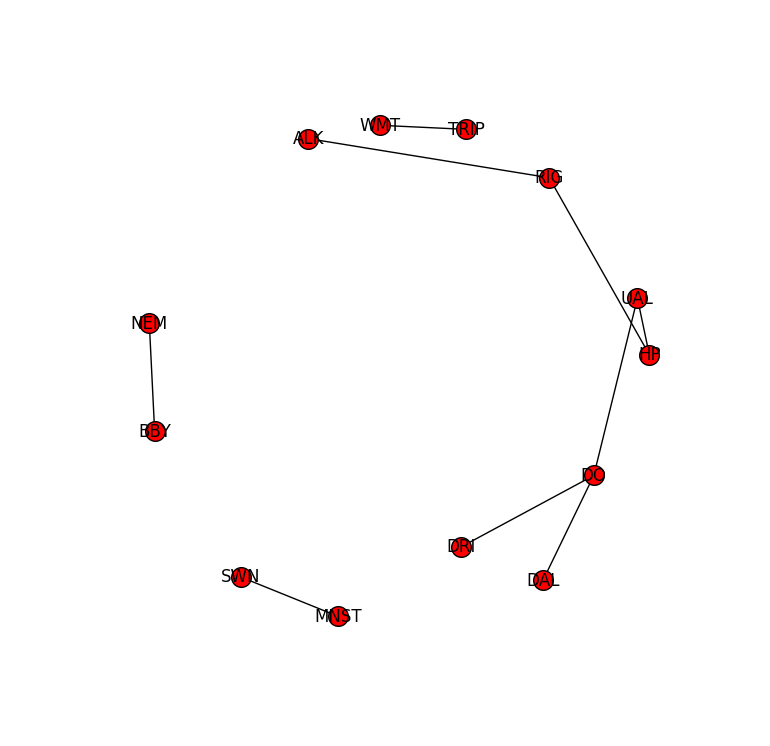

In [20]:
initiateCluster()
#run cluster for 10 iterations
test1Pointer, testedge = tryCluster(10)
#display the graph
displayGraph(testedge)

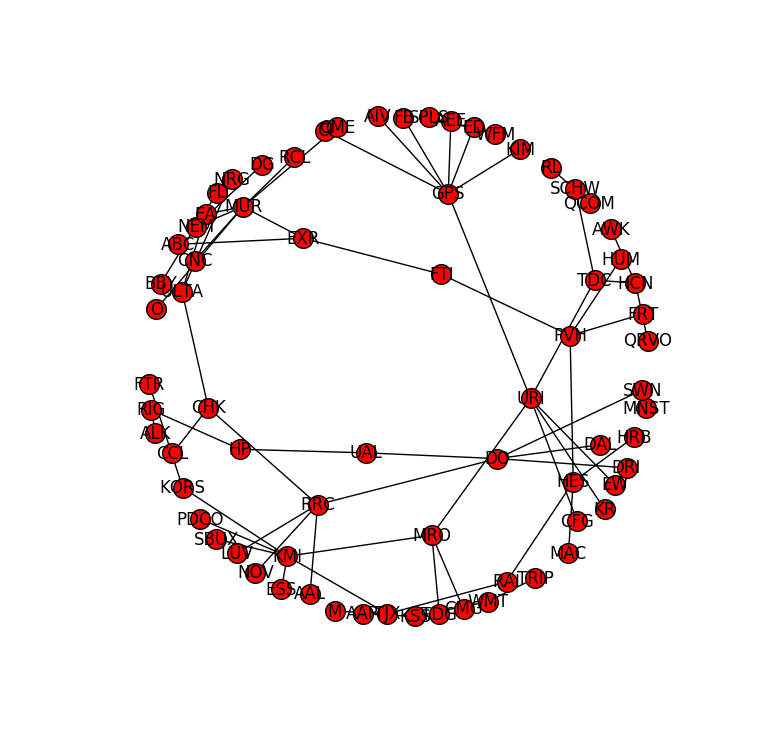

In [21]:
initiateCluster()
#run cluster for 100 iterations
test1Pointer, testedge = tryCluster(100)
#display the graph
displayGraph(testedge)

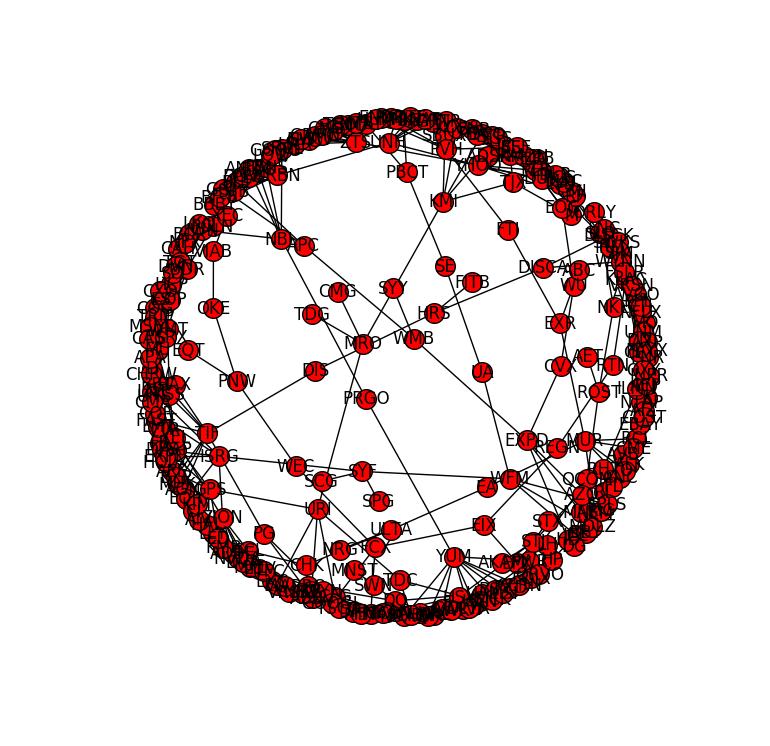

In [22]:
initiateCluster()
#run cluster for 100 iterations
test1Pointer, testedge = tryCluster(1000)
#display the graph
displayGraph(testedge)

The analysis shows that for the first graph with 10 iterations, there were 13 companies, which produced 4 clusters. For 100 and 1000 iterations, it has produced more companies and connections between them (see detailed stats further below). As a company got connected more as ending point, the graph will display it inside the circle to demonstrate that this company has significant impact on its connecting companies (i.e. potential 'leader'stock). The companies with one connection would stay at the edge of the circle and based on previous diagram, it implied that the less connections a company has, it would be pushed further into the circle center. 
Please note: During the project we struggled to produce a graph with no overlapped edges, but we still decided to include the graph as it is interesting to see how nodes' connections change with different k values

### In-Depth Analysis

In [24]:
#Function takes number of k iteration to produce list of clusters
def cluster(k):    
    
    #initiate cluster    
    nodePointers = {}
    for i in col:
        nodePointers[i] = i
    
   # nodePointers = tryCluster()

    #running clustering
    for i in range(k):
       inputa = sortCorr[i]
       startingpoint = inputa[1]
       endingpoint = inputa[2]
       while nodePointers[startingpoint] != startingpoint:
           startingpoint = nodePointers[startingpoint]
       while nodePointers[endingpoint] != endingpoint:
           endingpoint = nodePointers[endingpoint]
       nodePointers[startingpoint] = endingpoint

    #turning the dictionary with correlated items to a list
    npl= [(k,v) for k,v in nodePointers.items()]

    #code for allocating correlated share pairs into clusters. clusters will be separated by 'new cluster' statement.
    cl1=[] #list for elements of clusters
    for i in range(0,len(npl)):           
        if cl1==[]: cl1.append("new cluster")                       
        else: 
            if cl1[-1]!="new cluster": cl1.append("new cluster")    
    #if an element is not in the list of clusters- add this element
        if npl[i][0]!=npl[i][1]:                                
            if npl[i][0] not in cl1: cl1.append(npl[i][0])
            if npl[i][1] not in cl1: cl1.append(npl[i][1]) 
            j = 0
            while j < (len(npl)):       #loop to go through nodes: nodes connexted to elements added to the list should be added to the list 
                if npl[j][0] in cl1: 
                    if npl[j][1] not in cl1: 
                        cl1.append(npl[j][1])
                        j=0
                if npl[j][1] in cl1: 
                    if npl[j][0] not in cl1: 
                        cl1.append(npl[j][0])
                        j=0
                j+=1        

    #Creating dictionary showing clusters and companies per clusters
    count = 0
    for i in cl1:
        if i == 'new cluster':
            count += 1
    clusters = dict()
    j = 1       
    for i in range(count-1): 
        cluslist = list()
        while cl1[j] != 'new cluster':
            cluslist.append(cl1[j])
            j += 1
            if cl1[j] == 'new cluster':
                j = j + 1
                break
        clusters[i] = cluslist 
    return clusters,npl,cl1,k

clusters = cluster(5000)

In [26]:
#Populating a list for elemnts which are not part of clusters
def nonclust(k):    
    cl0=[] #list of remaining single elements, which are not part of any clusters
    npl = cluster(k)[1]
    cl1= cluster(k)[2]
    for i in range(0,len(npl)):           
        if npl[i][0] not in cl1:  #if company index is NOT in the list of clusters (cl1)- add to the list of non-clusters (cl0)  
            cl0.append(npl[i][0]) 
    return cl0

cl0 = nonclust(5000)
#len(nonclust(2))

In [ ]:
###Part 3: Outcome statements: 

#creating a graph showing how clusters behave with increasing number of k
def cluststat(lim):
    k=0
    clustsummary= pd.DataFrame()                        #creating a dataframe
    npl = cluster(k)[1]
    while k<=lim:                                       #setting up a loop for running cluster allocation for k from o to 'lim'
        cl0= nonclust(k)
        numclust = len(cluster(k)[0])                   # number of clusters
        if numclust==0: avclust = 0
        else: avclust = (len(npl)-len(cl0))/ numclust   # size of an average cluster

        clustcomp = len(npl)-len(cl0)                   # number of clustered elements

        #appending stats elements to the dataframe
        clustsummary= clustsummary.append({'k':k,'number of clusters': numclust, 'avg cluster size' : round(avclust,1), 'clusters elements': clustcomp, 'elements not in clusters': len(cl0)}, ignore_index=True)
        #print (k, numclust, round(avclust,1), clustcomp, len(cl0)) # print statement is not necessary, but it informs you of the progress       
        k += 400  #interval for k increments
    return clustsummary

clustsummary = cluststat(5000) # running the stats function for k iterations
#clustsummary2= cluststat(200) # running the stats function for k iterations


#plotting for data sets in relation to cluster stats
fig= plt.figure()
ax1= fig.add_subplot(2,2,1); plt.plot(clustsummary[['k']],clustsummary[['number of clusters']])
ax2= fig.add_subplot(2,2,2); plt.plot(clustsummary[['k']],clustsummary[['clusters elements']])
ax3= fig.add_subplot(2,2,3); plt.plot(clustsummary[['k']],clustsummary[['avg cluster size']])
ax4= fig.add_subplot(2,2,4); plt.plot(clustsummary[['k']],clustsummary[['elements not in clusters']])
#assigning graphs titles
ax1.set_title('number of clusters')  
ax2.set_title('elements in clusters')
ax3.set_title('average cluster size'); ax3.set_xlabel('number of k iterations')
ax4.set_title('elements not in clusters'); ax4.set_xlabel('number of k iterations')
plt.subplots_adjust(hspace=0.4) #setting space between the graphs 
plt.show()
#plt.savefig('clustsumary.png')  # saving graph

![Cluster Summary](https://github.com/JamesWeii/DSA/blob/master/clustsumary.png?raw=true)
![Cluster Summary 2](https://github.com/JamesWeii/DSA/blob/master/clustsumary2.png?raw=true)

**Table 1**: The Cluster analysis for large k.

|	k	|	Number of Clusters	|	Average Cluster Size	|	Clusters Elements	|	Elements not in clusters	|
|	------	|	-------------------	|	-------------------------:	|	----------------------:	|	-------------:	|
|	0	|	0	|	0.0	|	0	|	496	|
|	200	|	15	|	5.2	|	78	|	418	|
|	400	|	18	|	6.3	|	113	|	383	|
|	600	|	22	|	6.2	|	136	|	360	|
|	800	|	30	|	5.7	|	172	|	324	|
|	1000	|	34	|	6.0	|	203	|	293	|
|	1200	|	41	|	5.8	|	239	|	257	|
|	1400	|	37	|	7.1	|	262	|	234	|
|	1600	|	34	|	8.2	|	280	|	216	|
|	1800	|	29	|	10.2	|	295	|	201	|
|	2000	|	26	|	11.7	|	304	|	192	|
|	2200	|	24	|	13.2	|	318	|	178	|
|	2400	|	23	|	14.3	|	330	|	166	|
|	2600	|	20	|	16.9	|	337	|	159	|
|	2800	|	19	|	17.9	|	340	|	156	|
|	3000	|	16	|	21.8	|	349	|	147	|
|	3200	|	13	|	27.2	|	354	|	142	|
|	3400	|	12	|	29.9	|	359	|	137	|
|	3600	|	11	|	33.1	|	364	|	132	|
|	3800	|	10	|	36.6	|	366	|	130	|
|	4000	|	9	|	41.7	|	375	|	121	|
|	4200	|	8	|	47.0	|	376	|	120	|
|	4400	|	7	|	54.1	|	379	|	117	|
|	4800	|	7	|	54.6	|	382	|	114	|
|	5000	|	7	|	55.0	|	385	|	111	|
|	5000	|	7	|	55.0	|	385	|	111	|


**Table 2:** The Cluster analysis for small k

|	k	|	Number of Custers	|	Average Cluster Size	|	Cluster Elements	|	Elements not in Clusters	|
|-------------------------:|----------------------:|------------------------------:|-------:|----------------------:|
|	0	|	0	|	0.0	|	0	|	496	|
|	8	|	6	|	2.3	|	14	|	482	|
|	16	|	11	|	2.5	|	27	|	469	|
|	24	|	12	|	2.8	|	33	|	463	|
|	32	|	12	|	3.0	|	36	|	460	|
|	40	|	10	|	3.7	|	37	|	459	|
|	48	|	13	|	3.4	|	44	|	452	|
|	56	|	13	|	3.6	|	47	|	449	|
|	64	|	15	|	3.5	|	53	|	443	|
|	72	|	14	|	3.9	|	55	|	441	|
|	80	|	13	|	4.4	|	57	|	439	|
|	88	|	13	|	4.4	|	57	|	439	|
|	96	|	12	|	4.8	|	58	|	438	|
|	104	|	14	|	4.6	|	64	|	432	|
|	112	|	14	|	4.7	|	66	|	430	|
|	120	|	15	|	4.5	|	68	|	428	|
|	128	|	16	|	4.4	|	70	|	426	|
|	136	|	17	|	4.3	|	73	|	423	|
|	144	|	17	|	4.3	|	73	|	423	|
|	152	|	17	|	4.4	|	74	|	422	|
|	160	|	15	|	4.9	|	74	|	422	|
|	168	|	15	|	5.0	|	75	|	421	|
|	176	|	15	|	5.0	|	75	|	421	|
|	184	|	15	|	5.1	|	76	|	420	|
|	192	|	15	|	5.1	|	76	|	420	|
|	200	|	15	|	5.2	|	78	|	418	|


As seen from the table and graph above number of clusters go up with increase in k. number of clusters reach 41 in the region of 1,200 iterations. After 1,200 iterations the number of clusters starts reducing as the clusters merge and grow in side, therefore we can see increase in average size of a cluster

#### Industry Analysis  
This section focuses on types of industry of a company in a cluster. The analysis focuses on 10, 100, and 1000 iterations (k). The table shows this result:  

**Table 3** Industries within a cluster (k=10)

| Cluster     | Industry Type     |
|-------------|-------------------|
| 0           | Consumer Discretionary, Industrials     |
| 1           | Financials, Financials, Financials, Financials     |
| 2           | Utilities, Utilities     |
| 3           | Information Technology, Information Technology     |
| 4           | Consumer Discretionary, Consumer Discretionary     |
| 5           | Consumer Discretionary, Consumer Discretionary     |
| 6           | Consumer Discretionary, Consumer Discretionary     |  


This table showed the result for 100 iterations  

**Table 4** Industries within a cluster (k=100)

| Cluster     | Industry Type     |
|-------------|-------------------|
| 0           | Consumer Discretionary, Industrials     |
| 1           | Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities, Utilities     |
| 2           | Financials, Financials, Financials     |
| 3           | Financials, Financials, Financials, Financials     |
| 4           | Financials, Financials, Financials, Financials, Financials     |
| 5           | Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials, Financials     |
| 6           | Information Technology, Information Technology     |
| 7           | Consumer Discretionary, Consumer Discretionary     |
| 8           | Financials, Financials, Financials, Financials     |
| 9           | Consumer Discretionary, Consumer Discretionary     |
| 10           | Consumer Discretionary, Consumer Discretionary     |
| 11           | Consumer Discretionary, Consumer Discretionary     |
| 12           | Energy, Energy     |

In [34]:
#Change company names dictionary to list
indinfo= [(k,v) for k,v in companyNames.items()]

#Please note that this code worked in Sypder to produce list as we explained in the table, but we found technical issues
#with Jupyter which always produce different results.We still put our code here as the evidence of our effort and to support our discussion

#analysis of clusters. Adding information related to the industry
def clustdesc(k):
    testdict=dict() #creating an empty dictionary
    clusters= cluster(k)[0]     
    for i in range(0,len(clusters)-1):  #going through clusters
        templ=list()                        #empty the list
        for j in range(0,len(clusters[i])):   #going through elements in a cluster i
            
            for k in range(0,len(indinfo)):       #going through elements of the stock-industry table
                if clusters[i][j]==indinfo[k][0]:  #for a company in the list- bring its industry and attach it to the temp list 
                    templ.append(indinfo[k][1][1])                
                testdict[i] = templ       #add industry information per cluster to the dictionary
    return testdict

#clustdesc(10)

In order to understand the clustering better, the analysis has been performed of clusters in relation to companies' industries for k=10, 100 and 1000 iterations.

For k=10: There are 7 clusters (1 cluster with 4 elements and 6 clusters with 2 elements each). It is clear to see that in 6 out of 7 clusters all elements in a cluster are from same industry. This is not surprising as one would expect companies from same industry to be highly correlated with each other. The only exception is for the following companies:

Johnson Controls (JCI): Consumer Discretionary Tyco International (TYC): Industrials 

These two companies have correlation which is very close to 1 and is the highest correlation found in this analysis. Further research shows that the companies announced plan for a merger in November 2014.(Security, 2014) The merger has only been completed in September 2016 (Controls, 2016) which means that the shares were moving in unison for the dates between the announcement and the completion of the merger. This period of completing the merger includes the whole of 2015, which explains why these two companies have such a high correlation. 

Let's see if the same clustering approach holds for higher k's

For k=100: There are 13 clusters (2 clusters with 17 and 14 elements respectively and the rest of the clusters have elements equal or below 4). Similarly to k=10, clusters here are formed by companies from same industries for 12 out of 13 clusters. 

For k=1000: There are 33 clusters (4 biggest clusters include 67, 24, 20 and 19 elements). By analysing the biggest cluster, we can see that most of the companies (54 out of 67) in the cluster are from Financials industry, however there are also 10 from Industrials, two from Consumer Discretionary and one from Healthcare industries. Here we observe the process where clusters grow in size by including companies with comparatively low (not as high as for lower k) correlations. As a result the clusters are being formed by companies from different industries and therefore less representative in terms of behaviour of certain elements within the cluster. This trend will become stronger with higher k iterations where number of clusters will be reducing, but size (number of elements in a cluster) will be going up. 

#### Verification of clusters.
In order to check how shares behave in a cluster, we have 'normalised' stock prices and plotted their behaviour over the year on the graph to see whether the stocks are correlated or not.
For this analysis we have looked at biggest clusters for k=100 and k=1000. (see graphs below). 

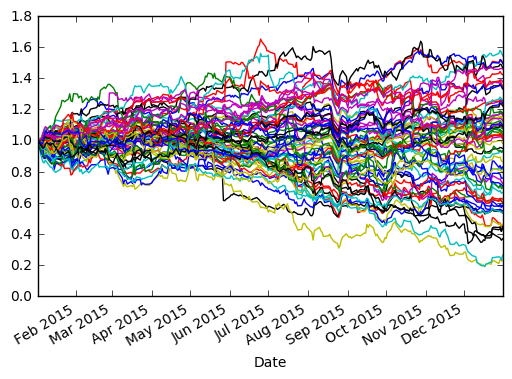

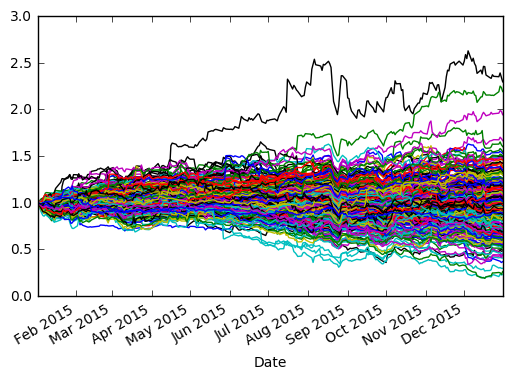

In [35]:
#'normalising the prices, i.e. setting prices to 1 at the beginning of the year to enable ease of comparison
dailyRet3= priceData.copy()
for i in range (0,len(priceData)): 
    for j in range (0,(priceData.shape[1])):
        if i==0: dailyRet3.iloc[i,j] = 1
        else:dailyRet3.iloc[i,j]= dailyRet3.iloc[i-1,j]*(1+ dailyret.iloc[i,j])

#creating a dataframe for cluster 1 when run for 100 iterations
clust1temp = pd.DataFrame(columns = cluster(100)[0][0], index = dailyRet3.index)
for i in clust1temp.columns:
    for k in dailyRet3.columns:
        if i == k:
            clust1temp[i] = dailyRet3[k]
 
  
#creating a dataframe for cluster 1 when run for 1000 iterations
clust2temp = pd.DataFrame(columns = cluster(1000)[0][0], index = dailyRet3.index)
for i in clust2temp.columns:
    for k in dailyRet3.columns:
        if i == k:
            clust2temp[i] = dailyRet3[k]

%matplotlib inline
            
#plotting a graph for cluster with k=100
clust1temp.index = pd.to_datetime(clust1temp.index)
clust1temp.plot(legend=None)
plt.show()

#plotting a graph for cluster with k=1000
clust2temp.index = pd.to_datetime(clust2temp.index)
clust2temp.plot(legend=None)
plt.show() 

As we can see from the above plots, the stocks for k=100 moving relatively similar within a change level between -0.2 to +0.15 over a year. This proves that the clustering works as the chosen stocks in clusters moved somewhat similar.

For k=1000, the stocks in the cluster perform differently to k=100. First of all, there are more stocks in the cluster. Secondly the performance of the stocks over the year is quite different now as the yearly returns vary from -0.35 to +0.35.

Later in the report (see part 4) I will analyse how our newly suggested improvement to clustering compare to the results we have seen here.

## Part 4. Extra analysis

Financial Application Clustering is a widely used approach in financial industry. The algorithm discussed in this report, also has a scope in financial applications as it groups similarly performing stocks based on its correlation (as discussed above), however there are a few drawbacks.

First of all, as shown above, the number of clusters is highly dependent on the number of iterations (k). As k has been chosen randomly during the analysis, it is difficult to identify the number of k that gives the optimal number of clusters to maximise effectiveness of the clustering produced by the algorithm. Secondly, as soon as the number of nodes in a cluster goes beyond 2, there is a loss of systematic connectedness inside the cluster: while it is valid to conclude that the elements of a cluster are highly correlated for two-element clusters, this is not necessarily the case when adding a third element or even more so when merging clusters. This is due the fact that the algorithm adds an element to a cluster based on the relationship between the two elements of the cluster instead of the relationship between the new element and all other elements of the cluster. For example, the algorithm adds an element C to the cluster A-B based on the high correlation of B-C regardless the relationship of A-C. To summarise, some elements inside a cluster are highly correlated, however there might not be obvious relation between the majority of them. 

Leader Stock In relation to using a "leader stock" for a cluster, it is generally speaking a useful approach as it would enable an investor to have the same exposure as the whole cluster by buying just one stock. Furthermore if stocks movements follow movements of the leader, an investor could simply buy and sell stocks based on the movements of the leader. This approach is widely used by algorithmic trading firms who are able to react instantly to any movements in price movement of a ‘leader’ stock.

In order to identify the leaders a further analysis of the movement of stocks if required on a more detailed basis (millisecond level) rather than looking at EOD prices.

In relation to current algorithm and the data available the identification of ‘leader’ stock is not appropriate/feasible due to the limitations of data. Furthermore, as discussed above there is somewhat weak relationship between some of the elements, having a leading stock would have a limited effect.

Looking at the algorithm closer it becomes obvious why using a ‘leader’ stock might be problematic. Let’s say there are two clusters A-B and C-D with B and D as the leaders (in the algorithm represented as pointing to themselves). As soon as we have a relationship between any element of the clusters, it will connect the leaders B and D and keep only D as the new leader. As the metric for correlation is two sided the algorithm will choose either one of them as a leader, so the actual leader of a cluster is chosen randomly. Here we refer to a ‘leader’ as a node with the most connections within a cluster. 

### Exploring other clustering methods

As discussed above, one of the key limitation of the algorithm is the fact that some elements could be clustered together without a high correlation to each other through other highly correlated elements. This new algorithm aims to improve on this limitation by ensuring that for an element to be added to the cluster is highly correlated to ALL elements of the cluster (as oppose to at least one using the old algorithm). It still uses the sorted correlation list as an input to identify highly correlated elements, but rather than focus on number of iterations, it takes into account a cut off correlation value as an input which means that only stocks higher than certain correlation value are used for clustering. The practical use of this algorithm could be two-fold: 

a) it could be used to identify clusters of companies while ensuring that every company in a cluster behaves similar to the others. It would benefit an investor looking to maximise its profits, by ensuring that stocks are moving in the same direction (highly correlated). It is important to note that by potentially offering high return, it also present higher risk and therefore will only benefit investors with high risk appetite.

In [36]:
nodePointers= initiateCluster()

b = nodePointers.copy()

# create two new dictionaries with same keys
aDict = b.copy()
aDict2 = b.copy()
highcorr = {}

# algorithm to create highly correlated clusters
def corrcluster_high(cut):
    cutoff = [x for x in range(0, len(sortCorr)) if sortCorr[x][0] >= cut] # no need to look through all data, correlation below cutoff is not possible to be added to cluster
    for i in col:
        aDict[i] = [i]  # dictionary for selfpointing nodes 
    for i in cutoff:
        for a in col:
            aDict2[a] = [1] # dictionary for correlation, resets after each iteration
        input2 = sortCorr[i]
        startingpoint = input2[1] # first stock
        endingpoint = input2[2] # second stock
        for k in aDict[startingpoint]: # go through all elements of cluster of the starting point
            for m in aDict[endingpoint]: # go through all elements of cluster of the ending point
                for j in range(0,len(sortCorr)): # look in sorted list for correlation between elements in starting point cluster and ending point cluster
                    if sortCorr[j][1] == m and sortCorr[j][2] == k: 
                        aDict2[startingpoint].append(sortCorr[j][0]) # append the correlation to the startingpoint dict
                    if sortCorr[j][2] == m and sortCorr[j][1] == k:
                        aDict2[endingpoint].append(sortCorr[j][0]) # append the correlation to the endingpoint dict
        if all (o >= cut for o in aDict2[startingpoint]):
            if all (b >= cut for b in aDict2[endingpoint]): # checking if all correlations between all element of bost clusters are over cutoff point
                for s in aDict[startingpoint]:  # connect clusters
                    if s not in aDict[endingpoint]:
                        aDict[endingpoint].append(s)
                for t in aDict[endingpoint]:
                    if t not in aDict[startingpoint]:
                        aDict[startingpoint].append(t)
    return aDict

#try function for at least 0.8 correlation
highcorr = corrcluster_high(0.80)

# copy clusters into new dictionary
highcorr_clean = {}
for key in highcorr.keys():
    if len(highcorr[key]) == 1:
        highcorr[key] = [1]
    if highcorr[key] != 1:
        for i in range(1, len(highcorr[key])):        
            highcorr[highcorr[key][i]] = [1]
    if len(highcorr[key]) > 1:
        highcorr_clean[key] = highcorr[key]

b) by setting correlation cut off point as low, it would enable that the resulted clusters have very low correlation to each other and therefore will represent a very diversified portfolio. Practical application of this version of the algorithm will suit investors with low risk appetite, who look for stable dividend return without too much of exposure to price swings in individual stocks

In [37]:
 # create new dictionaries
aDict3 = {}
aDict4 = {}

# algorithm like the one above, modified to cluster for low correlation
def corrcluster_low(cut):
    sortCorr2 = sorted(sortCorr, reverse=False)
    lowerbound = min([x for x in range(0, len(sortCorr2)) if sortCorr2[x][0] > -cut])
    upperbound = max([x for x in range(0, len(sortCorr2)) if sortCorr2[x][0] <= cut])
    cutoff = range(lowerbound, upperbound)
    for i in col:
        aDict3[i] = [i]
    for i in cutoff:
        for a in col:
            aDict4[a] = [0]
        input2 = sortCorr2[i]
        startingpoint = input2[1]
        endingpoint = input2[2]
        for k in aDict3[startingpoint]:
            for m in aDict3[endingpoint]:
                for j in range(0,len(sortCorr2)):
                    if sortCorr2[j][1] == m and sortCorr2[j][2] == k:
                        aDict4[startingpoint].append(abs(sortCorr2[j][0]))
                    if sortCorr2[j][2] == m and sortCorr2[j][1] == k:
                        aDict4[endingpoint].append(abs(sortCorr2[j][0]))
        if all (o <= cut for o in aDict4[startingpoint]):
            if all (b <= cut for b in aDict4[endingpoint]):
                for s in aDict3[startingpoint]:
                    if s not in aDict3[endingpoint]:
                        aDict3[endingpoint].append(s)
                for t in aDict3[endingpoint]:
                    if t not in aDict3[startingpoint]:
                        aDict3[startingpoint].append(t)
    return aDict3                
                
#try function for at most 0.1 correlation               
lowcorr = corrcluster_low(0.1)             

# copy clusters into new dictonary
lowcorr_clean = {}
for key in lowcorr.keys():
    if len(lowcorr[key]) == 1:
        lowcorr[key] = [1]
    if lowcorr[key] != 1:
        for i in range(1, len(lowcorr[key])):        
            lowcorr[lowcorr[key][i]] = [1]
    if len(lowcorr[key]) > 1:
        lowcorr_clean[key] = lowcorr[key]

As we have discussed above, this new approach is likely to cluster stocks with similar correlation more efficiently. Now we would like to confirm this assumption by looking how stocks within the newly generated cluster perform over the year comparing to the cluster performance using the original algorithm.

Similarly to the plotting approach in section 3, we first 'normalise' the prices of the new cluster by setting all prices at the beginning of the period to 1. Then we can plot the graph (see graphs below).

In [89]:
####New Approach - graphical representation

# normalising prices for newly created cluster (new approach)
clust3temp = pd.DataFrame(columns = highcorr_clean, index = dailyRet3.index)
for i in clust3temp.columns:
    for k in dailyRet3.columns:
        if i == k:
            clust3temp[i] = dailyRet3[k]
   


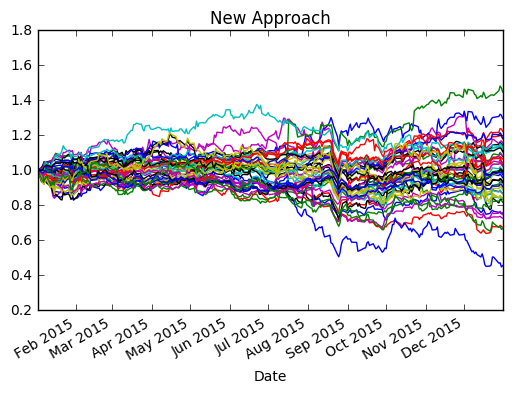

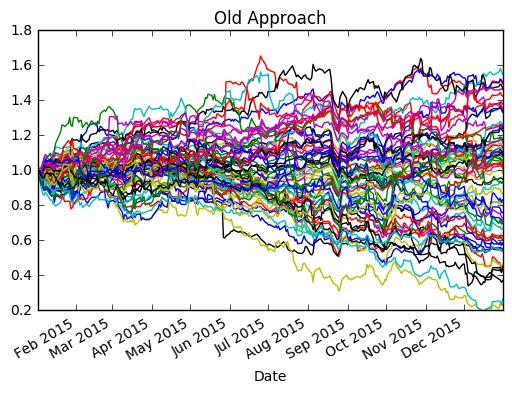

In [134]:
#New Approach graphical representation
import matplotlib.pyplot as plt  
#plotting the graph (new approach)
clust3temp.index = pd.to_datetime(clust3temp.index)
ax = clust3temp.plot(legend=None, title="New Approach")
ax.set_ylim(0.2,1.8)
plt.show()

#### Old Approach graphical representation
clust1temp.index = pd.to_datetime(clust1temp.index)
ax2=clust1temp.plot(legend=None, title="Old Approach")
ax2.set_ylim(0.2,1.8)
plt.show()

These two clusters are comparable as they have similar number of elements (14 for new approach and 17 for the old approach). As we can see from the graphs the new approach achieves much better results: the stocks within the cluster perform much more aligned to each other as their returns appear to be much more 'tighter' and therefore there is less correlation between the stocks.

As a result of this comparison, we can conclude that the newly proposed approach is more efficient in clustering stocks with similar correlation